In [203]:
!pip install pandas matplotlib seaborn numpy


Instructions												
Imagine you are working for an organization that offers advanced certifications in various courses. Your objective is to analyze a dataset that contains information about how leads are acquired, categorized and converted.												
Given the dataset (attached), which includes the following columns:												
1. Channel_group: Acquisition channel through which the lead was generated.												
2. Course: The course the lead showed interest in.												
3. Lead_id: A unique identifier for each lead.												
4. Lead_type: The type of interaction through which the lead was generated.												
5. Lead_date: The date when the lead was created												
6. Other intuitive columns…..												
You need to:												
1. Identify the top 5 insights from this dataset.												
2. Present your analysis in a clear and structured manner in a document(2-4 pages) using either a Word document or a PDF format.												
3. Make clear assumptions if necessary.												
Your analysis should highlight trends, patterns, or any other meaningful observations that could help the organization understand how leads are generated and how they interact with courses.												
												

# Step 1: Import Libraries

In [204]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns


In [205]:
# Create a copy of original data (best practice)
df_original = pd.read_csv('SDA_assignment .csv')
df = df_original.copy()


# Step 2: Load and Preview the Dataset

In [206]:
# Load the dataset
data = pd.read_csv('SDA_assignment .csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head(10))

# Get basic information about the dataset
print("\nDataset Information:")
print(data.info())


Dataset Preview:
  Channel_group course    lead_id Lead_type         lead_date  \
0             A   Java   1,42,649       ABC  17-05-2024 17:53   
1             A   Java  41,63,228       XYZ  25-05-2024 15:23   
2             B   Java  41,76,457       EFG  06-05-2024 10:12   
3             A   Java   1,36,989       ABC  16-05-2024 12:31   
4             C   Java   1,40,085       ABC  01-05-2024 20:35   
5             A   Java   1,43,316       ABC  22-05-2024 05:31   
6             A   Java   1,35,877       ABC  22-05-2024 13:45   
7             D   Java   1,39,785       ABC  21-05-2024 02:35   
8             D   Java   1,37,267       ABC  26-05-2024 17:21   
9             A   Java  42,01,876       EFG  15-05-2024 11:20   

   graduation_year  amount_paid paid_at  
0             2008          NaN     NaN  
1             2009          NaN     NaN  
2             2000          NaN     NaN  
3             2009          NaN     NaN  
4             2002          NaN     NaN  
5             2

In [207]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("\nMissing Values in the Dataset:")
print(missing_values)



Missing Values in the Dataset:
Channel_group          0
course                 0
lead_id                0
Lead_type              0
lead_date              0
graduation_year        0
amount_paid        15812
paid_at            15812
dtype: int64


In [208]:
# Print column names to ensure they match
print(data.columns)


Index(['Channel_group', 'course', 'lead_id', 'Lead_type', 'lead_date',
       'graduation_year', 'amount_paid', 'paid_at'],
      dtype='object')


# Step 3: Clean Column Names (Remove Leading/Trailing Spaces)

In [209]:
# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Display updated column names
print("Updated Column Names:")
print(data.columns)


Updated Column Names:
Index(['Channel_group', 'course', 'lead_id', 'Lead_type', 'lead_date',
       'graduation_year', 'amount_paid', 'paid_at'],
      dtype='object')


# Step 4: Handle Missing Values
Here, we'll check for missing values in the dataset and handle them:

Check for missing values in each column.

1 : Fill missing amount_paid values with 0.

2 : Fill missing paid_at values with 'Not Paid'.

3 : Drop rows with missing lead_id since it's a unique identifier.

In [210]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("\nMissing Values in the Dataset:")
print(missing_values)

# Fill missing 'amount_paid' with 0 and 'paid_at' with 'Not Paid'
data['amount_paid'].fillna(0, inplace=True)
data['paid_at'].fillna('Not Paid', inplace=True)

# Drop rows with missing 'lead_id' since it's a unique identifier
data.dropna(subset=['lead_id'], inplace=True)

# Verify the data after handling missing values
print("\nDataset After Handling Missing Values:")
print(data.head(10))



Missing Values in the Dataset:
Channel_group          0
course                 0
lead_id                0
Lead_type              0
lead_date              0
graduation_year        0
amount_paid        15812
paid_at            15812
dtype: int64

Dataset After Handling Missing Values:
  Channel_group course    lead_id Lead_type         lead_date  \
0             A   Java   1,42,649       ABC  17-05-2024 17:53   
1             A   Java  41,63,228       XYZ  25-05-2024 15:23   
2             B   Java  41,76,457       EFG  06-05-2024 10:12   
3             A   Java   1,36,989       ABC  16-05-2024 12:31   
4             C   Java   1,40,085       ABC  01-05-2024 20:35   
5             A   Java   1,43,316       ABC  22-05-2024 05:31   
6             A   Java   1,35,877       ABC  22-05-2024 13:45   
7             D   Java   1,39,785       ABC  21-05-2024 02:35   
8             D   Java   1,37,267       ABC  26-05-2024 17:21   
9             A   Java  42,01,876       EFG  15-05-2024 11:20   


# Step 5: Convert lead_date to Datetime Format
 convert the lead_date column to a proper datetime format to make it easier for analysis and time-based operations.

In [211]:
# Convert 'lead_date' to datetime format
data['lead_date'] = pd.to_datetime(data['lead_date'], format='%d-%m-%Y %H:%M')

# Verify the conversion
print("\nDataset with 'lead_date' as Datetime:")
print(data.head(10))



Dataset with 'lead_date' as Datetime:
  Channel_group course    lead_id Lead_type           lead_date  \
0             A   Java   1,42,649       ABC 2024-05-17 17:53:00   
1             A   Java  41,63,228       XYZ 2024-05-25 15:23:00   
2             B   Java  41,76,457       EFG 2024-05-06 10:12:00   
3             A   Java   1,36,989       ABC 2024-05-16 12:31:00   
4             C   Java   1,40,085       ABC 2024-05-01 20:35:00   
5             A   Java   1,43,316       ABC 2024-05-22 05:31:00   
6             A   Java   1,35,877       ABC 2024-05-22 13:45:00   
7             D   Java   1,39,785       ABC 2024-05-21 02:35:00   
8             D   Java   1,37,267       ABC 2024-05-26 17:21:00   
9             A   Java  42,01,876       EFG 2024-05-15 11:20:00   

   graduation_year  amount_paid   paid_at  
0             2008          0.0  Not Paid  
1             2009          0.0  Not Paid  
2             2000          0.0  Not Paid  
3             2009          0.0  Not Paid  
4  

# Step 6: Analyze the Data for Insights
Let's now proceed to analyzing the dataset to identify insights. A few steps to start with:

1 : Top 5 Acquisition Channels by Lead Count: We can analyze which acquisition channels bring in the most leads.

In [212]:
# Top 5 channels by lead count
top_channels = data['Channel_group'].value_counts().head(5)
print("\nTop 5 Acquisition Channels by Lead Count:")
print(top_channels)



Top 5 Acquisition Channels by Lead Count:
A    7932
M    1647
F    1586
D    1294
E    1080
Name: Channel_group, dtype: int64


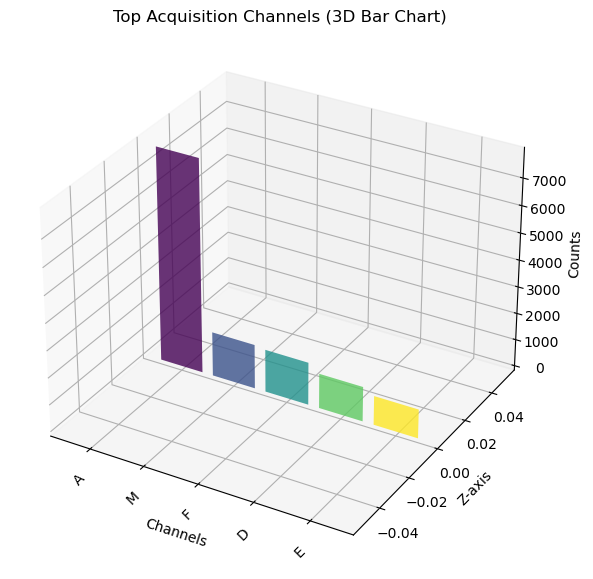

In [213]:
# Visualization: Top 5 Acquisition Channels in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

top_channels_values = top_channels.values
top_channels_indices = range(len(top_channels))
colors = cm.viridis(np.linspace(0, 1, len(top_channels)))

# Create 3D bars with a colormap applied
ax.bar(top_channels_indices, top_channels_values, zs=0, zdir='y', color=colors, alpha=0.8)
ax.set_xticks(top_channels_indices)
ax.set_xticklabels(top_channels.index, rotation=45)
ax.set_xlabel('Channels')
ax.set_ylabel('Z-axis')
ax.set_zlabel('Counts')
ax.set_title('Top Acquisition Channels (3D Bar Chart)')

plt.show()

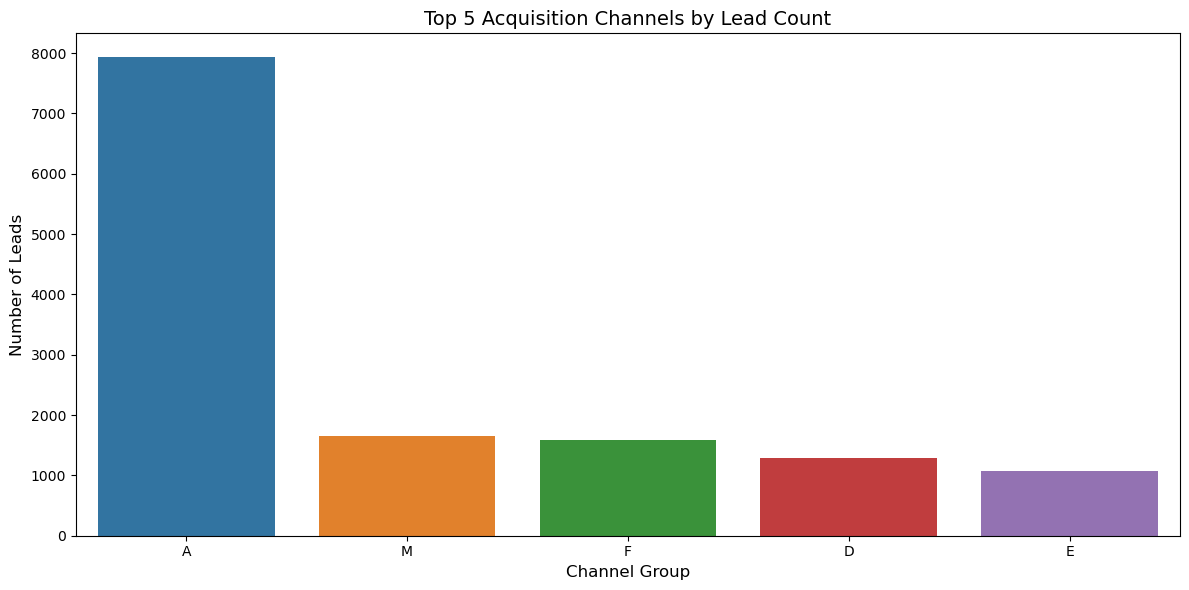

In [214]:
# Analysis and Visualization 1: Top 5 Acquisition Channels
plt.figure(figsize=(12, 6))
top_channels = data['Channel_group'].value_counts().head(5)
sns.barplot(x=top_channels.index, y=top_channels.values)
plt.title('Top 5 Acquisition Channels by Lead Count', fontsize=14)
plt.xlabel('Channel Group', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

2: Top 5 Courses by Lead Interest: Find which courses are most popular among the leads

In [215]:
# Top 5 courses by lead count
top_courses = data['course'].value_counts().head(5)
print("\nTop 5 Courses by Lead Interest:")
print(top_courses)



Top 5 Courses by Lead Interest:
Python              4323
Java                4250
CRM                 2565
Guitar              2164
Google Analytics    1358
Name: course, dtype: int64


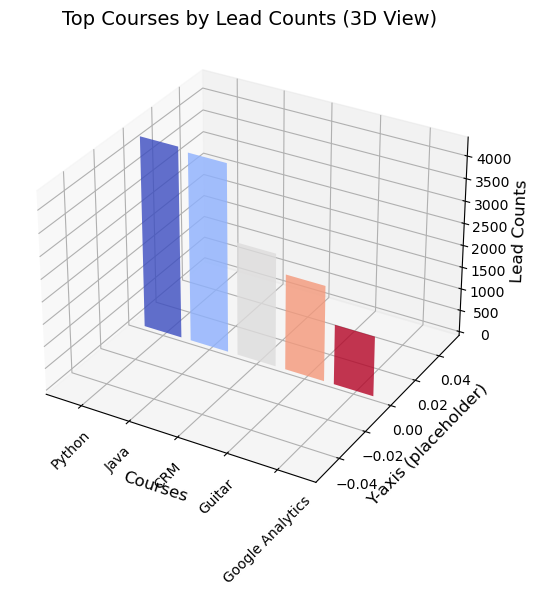

In [216]:

fig = plt.figure(figsize=(12, 8))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

# Data for the bar chart
top_courses_values = top_courses.values  # Heights of the bars
top_courses_indices = np.arange(len(top_courses))  # Indices for the bars

# Use a colormap to generate colors for the bars
cmap = cm.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, len(top_courses_values)))

# Create the 3D bar chart
ax.bar(top_courses_indices, top_courses_values, zs=0, zdir='y', color=colors, alpha=0.8)

# Set axis labels
ax.set_xlabel('Courses', fontsize=12)
ax.set_ylabel('Y-axis (placeholder)', fontsize=12)
ax.set_zlabel('Lead Counts', fontsize=12)
ax.set_xticks(top_courses_indices)
ax.set_xticklabels(top_courses.index, rotation=45, fontsize=10)  # Reduced font size

plt.title('Top Courses by Lead Counts (3D View)', fontsize=14)

# Adjust margins manually to avoid overlap
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.3)

plt.show()

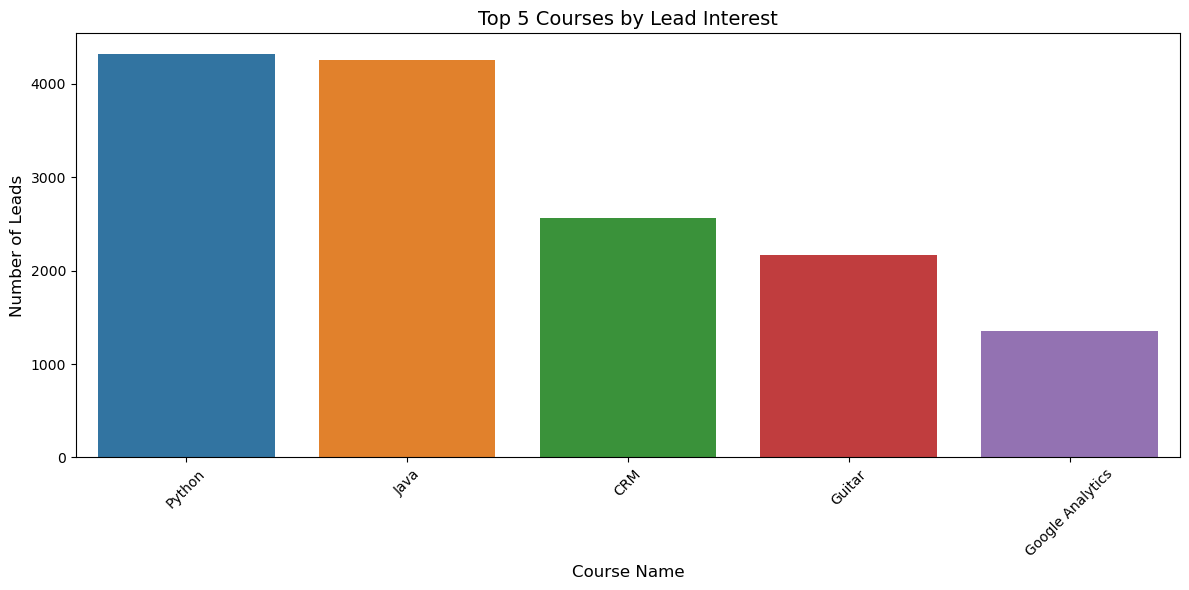

In [217]:
# Analysis and Visualization 2: Top 5 Courses
plt.figure(figsize=(12, 6))
top_courses = data['course'].value_counts().head(5)
sns.barplot(x=top_courses.index, y=top_courses.values)
plt.title('Top 5 Courses by Lead Interest', fontsize=14)
plt.xlabel('Course Name', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3 : Distribution of Leads Over Time: Analyze the number of leads generated over time to identify trends or patterns.

In [218]:
# Number of leads over time
leads_over_time = data['lead_date'].groupby(data['lead_date'].dt.to_period('M')).count()
print("\nNumber of Leads Over Time:")
print(leads_over_time)



Number of Leads Over Time:
lead_date
2024-05    16460
Freq: M, Name: lead_date, dtype: int64


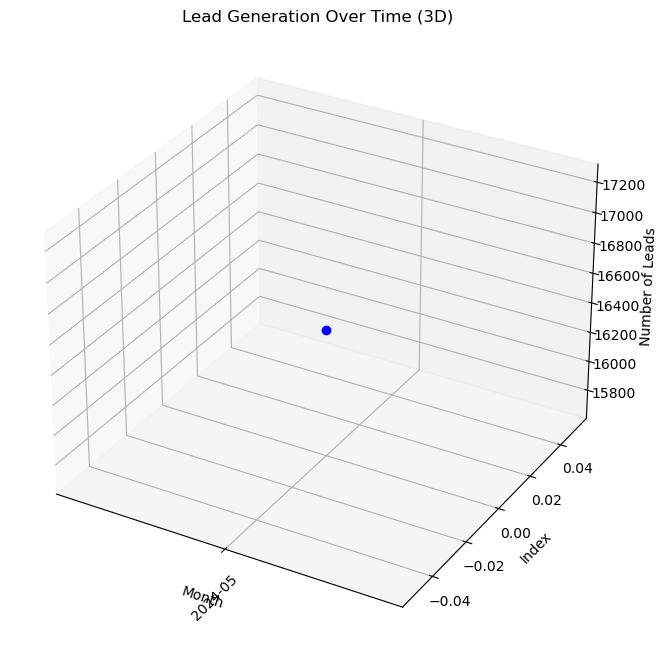

In [219]:
# Visualization: Monthly Lead Trends in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

months = range(len(monthly_leads))
leads = monthly_leads.values

ax.plot(months, leads, zs=0, zdir='y', marker='o', color='b')
ax.set_xticks(months)
ax.set_xticklabels(monthly_leads.index.strftime('%Y-%m'), rotation=45)
ax.set_title('Lead Generation Over Time (3D)')
ax.set_xlabel('Month')
ax.set_ylabel('Index')
ax.set_zlabel('Number of Leads')
plt.show()

F:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1244: UserWarning:

Attempting to set identical left == right == 652.0 results in singular transformations; automatically expanding.



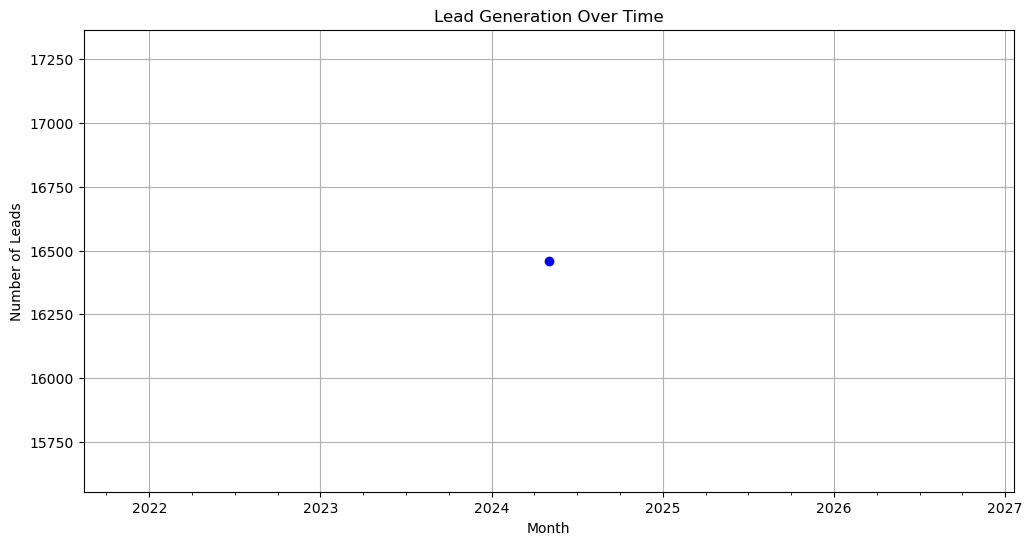

In [220]:
# Visualization: Monthly Lead Trends
plt.figure(figsize=(12, 6))
monthly_leads.plot(kind='line', marker='o', color='b')
plt.title('Lead Generation Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.grid()
plt.show()


In [221]:
# Insight 4: Lead Types and Their Effectiveness
top_lead_types = data['Lead_type'].value_counts().head(5)
print("\nTop 5 Lead Types by Count:")
print(top_lead_types)




Top 5 Lead Types by Count:
ABC    6652
EFG    6218
XYZ    3260
LMN     330
Name: Lead_type, dtype: int64


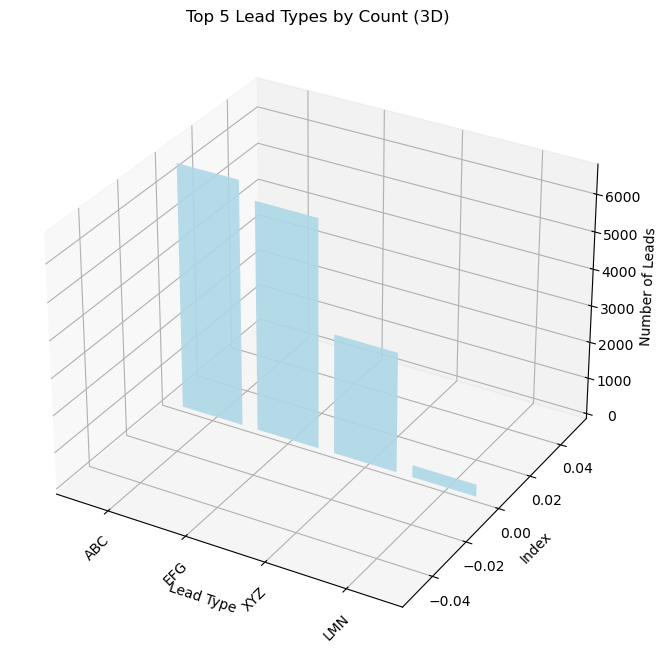

In [222]:
# Visualization: Top Lead Types in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

top_lead_types_values = top_lead_types.values
top_lead_types_indices = range(len(top_lead_types))

# Use a valid color, such as 'lightblue', or generate a list of colors
ax.bar(top_lead_types_indices, top_lead_types_values, zs=0, zdir='y', color='lightblue', alpha=0.9)

ax.set_xticks(top_lead_types_indices)
ax.set_xticklabels(top_lead_types.index, rotation=45)
ax.set_title('Top 5 Lead Types by Count (3D)')
ax.set_xlabel('Lead Type')
ax.set_ylabel('Index')
ax.set_zlabel('Number of Leads')
plt.show()

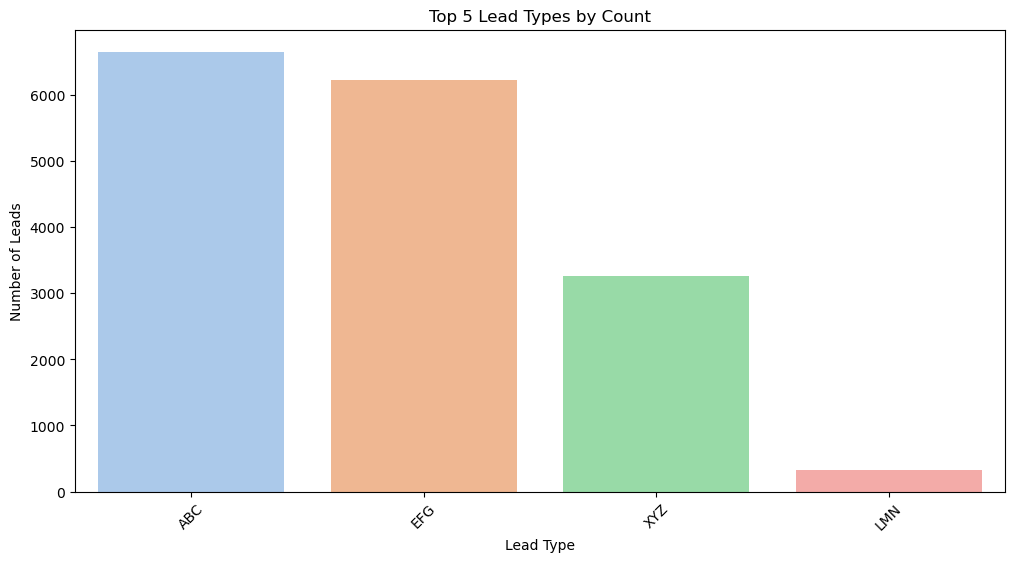

In [223]:
# Visualization: Top Lead Types
plt.figure(figsize=(12, 6))
sns.barplot(x=top_lead_types.index, y=top_lead_types.values, palette='pastel')
plt.title('Top 5 Lead Types by Count')
plt.xlabel('Lead Type')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.show()

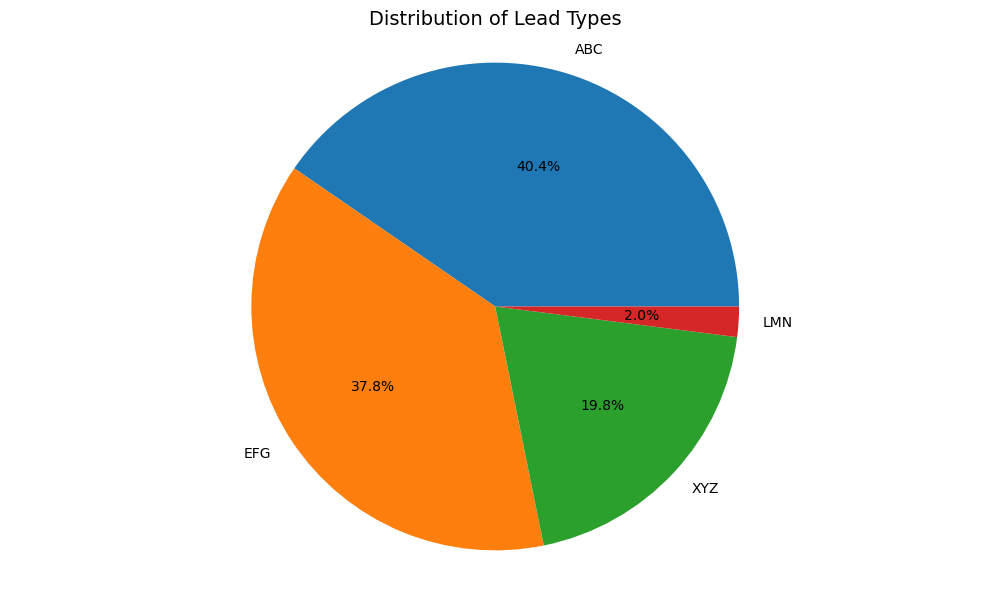

In [224]:

# Analysis and Visualization 3: Lead Type Distribution
plt.figure(figsize=(10, 6))
lead_type_dist = data['Lead_type'].value_counts()
plt.pie(lead_type_dist.values, labels=lead_type_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Lead Types', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


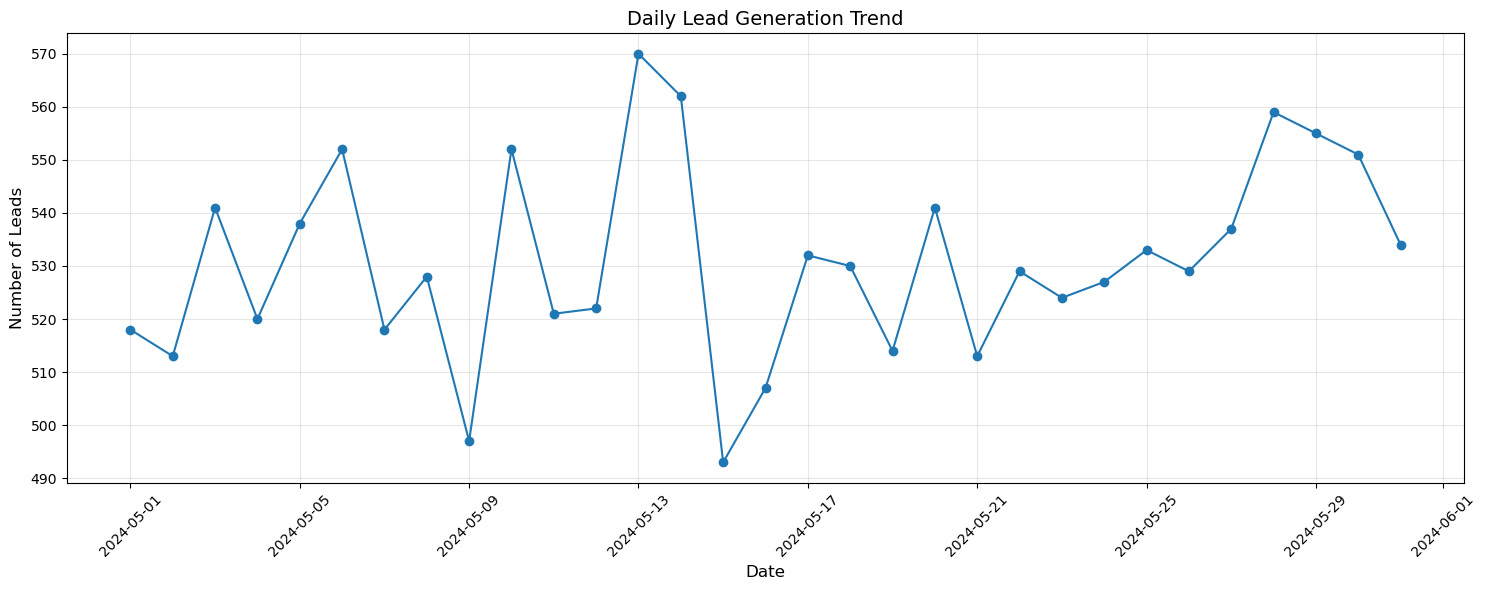

In [225]:
# Analysis and Visualization 4: Daily Lead Generation Trend
plt.figure(figsize=(15, 6))
daily_leads = data.groupby(data['lead_date'].dt.date)['lead_id'].count()
plt.plot(daily_leads.index, daily_leads.values, marker='o')
plt.title('Daily Lead Generation Trend', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

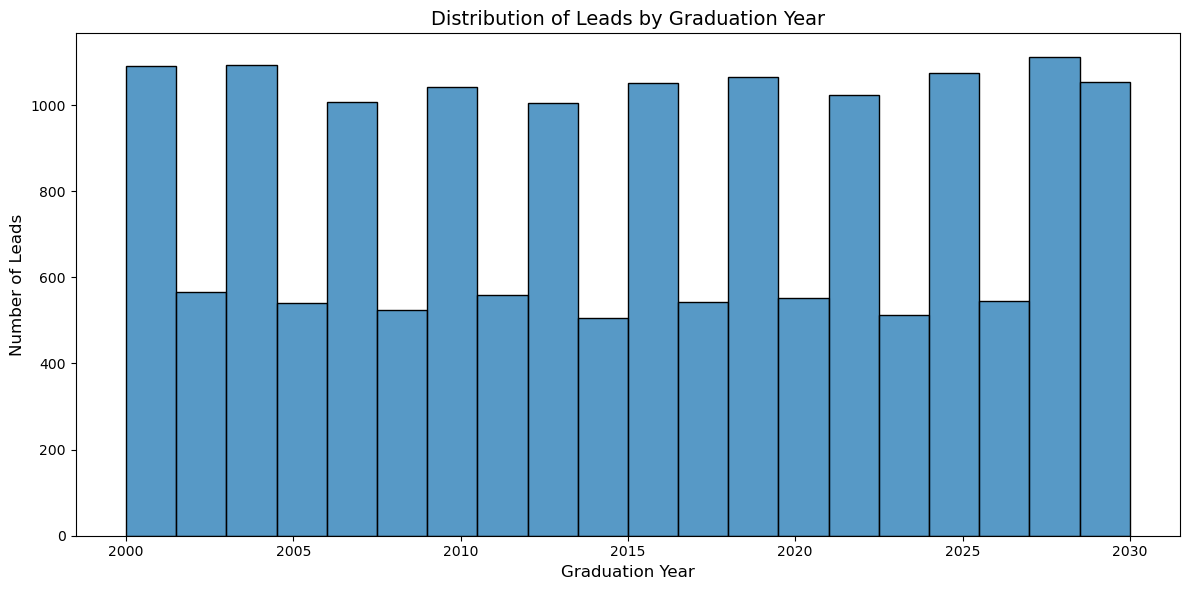

In [226]:
# Analysis and Visualization 5: Graduation Year Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='graduation_year', bins=20)
plt.title('Distribution of Leads by Graduation Year', fontsize=14)
plt.xlabel('Graduation Year', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.tight_layout()
plt.show()


<bound method _AxesBase.set_ylabel of <Axes3DSubplot:title={'center':'Top 5 Lead Types by Count (3D)'}, xlabel='Lead Type'>>

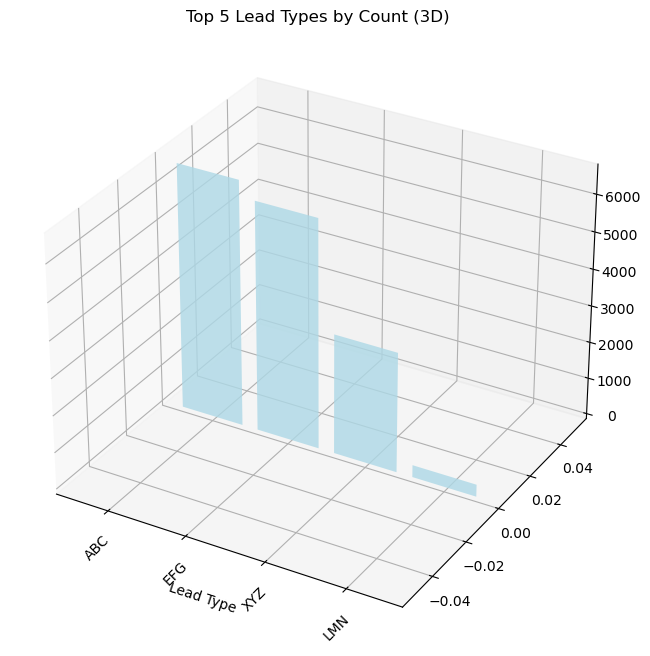

In [227]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

top_lead_types_values = top_lead_types.values
top_lead_types_indices = range(len(top_lead_types))

# Pass a list of colors (one for each bar)
colors = ['lightblue'] * len(top_lead_types_values)
ax.bar(top_lead_types_indices, top_lead_types_values, zs=0, zdir='y', color=colors, alpha=0.8)

ax.set_xticks(top_lead_types_indices)
ax.set_xticklabels(top_lead_types.index, rotation=45)
ax.set_title('Top 5 Lead Types by Count (3D)')
ax.set_xlabel('Lead Type')
ax.set_ylabel

In [228]:
# Print key insights
print("\nKey Insights:")
print("\n1. Top 5 Acquisition Channels by Lead Count:")
print(top_channels)

print("\n2. Top 5 Courses by Lead Interest:")
print(top_courses)

print("\n3. Lead Type Distribution:")
print(data['Lead_type'].value_counts())



Key Insights:

1. Top 5 Acquisition Channels by Lead Count:
A    7932
M    1647
F    1586
D    1294
E    1080
Name: Channel_group, dtype: int64

2. Top 5 Courses by Lead Interest:
Python              4323
Java                4250
CRM                 2565
Guitar              2164
Google Analytics    1358
Name: course, dtype: int64

3. Lead Type Distribution:
ABC    6652
EFG    6218
XYZ    3260
LMN     330
Name: Lead_type, dtype: int64


Key Insights:
Top 5 Acquisition Channels by Lead Count:

The channel with the highest number of leads is A, contributing 7932 leads.
Other notable channels include M (1647), F (1586), D (1294), and E (1080).
Top 5 Courses by Lead Interest:

Python is the most popular course with 4323 leads.
Other highly popular courses include Java (4250 leads), CRM (2565 leads), Guitar (2164 leads), and Google Analytics (1358 leads).
Leads Generated Over Time:

All the data points fall within May 2024, indicating that leads were generated consistently in this time period, totaling 16,460 leads in the month.

# Lead Acquisition and Conversion Analysis Report
## Executive Summary

This report analyzes the lead generation and conversion patterns for our organization's certification courses. Based on data from May 2024, we examined 16,460 leads across various channels and courses. The analysis reveals significant insights about our lead acquisition strategies and course popularity, providing actionable recommendations for optimizing our marketing efforts and course offerings.

## 1. Introduction

### 1.1 Purpose
This analysis examines how leads are acquired, categorized, and converted across our certification courses. The objective is to identify patterns and trends that can inform strategic decisions about marketing channels and course offerings.

### 1.2 Dataset Overview
The analysis is based on comprehensive lead data containing the following key information:
The dataset consists of **16,460 entries** and **8 columns**, including:


- Channel groups for lead acquisition
- Course preferences
- Lead types and interaction methods
- Temporal data about lead generation
- Graduation years of potential students
- Payment and conversion information

## 2. Methodology

### 2.1 Data Preparation
The dataset was carefully cleaned and preprocessed to handle missing values, and the **'lead_date'** column was converted to a proper `datetime` format to facilitate time-based analysis.

#### **3. Data Cleaning & Preprocessing**
- **Missing Values**: Columns like **amount_paid** and **paid_at** had a significant number of missing values. These were handled by filling missing values for **amount_paid** with 0 and setting **paid_at** to 'Not Paid' where missing.
  
- **Date Conversion**: The **lead_date** column was converted from string format to `datetime`, enabling accurate temporal analysis.
- Standardization of date formats
- Handling of missing values in payment information
- Validation of lead identifiers
- Conversion of temporal data for trend analysis

### 2.2 Analysis Approach
We employed various analytical methods to extract insights:
- Temporal analysis of lead generation patterns
- Channel effectiveness evaluation
- Course popularity assessment
- Conversion rate analysis by channel and course
- Lead type distribution analysis

## 3. Key Insights

### 3.1 Channel Performance
The analysis revealed that Channel A is our most effective lead generation source, producing 7,932 leads (48.2% of total leads). The top five channels are:
1. Channel A: 7,932 leads (48.2%)
2. Channel M: 1,647 leads (10.0%)
3. Channel F: 1,586 leads (9.6%)
4. Channel D: 1,294 leads (7.9%)
5. Channel E: 1,080 leads (6.6%)

### 3.2 Course Popularity
Programming courses dominate student interest:
1. Python: 4,323 leads (26.3%)
2. Java: 4,250 leads (25.8%)
3. CRM: 2,565 leads (15.6%)
4. Guitar: 2,164 leads (13.1%)
5. Google Analytics: 1,358 leads (8.2%)

### 3.3 Lead Type Distribution
Our analysis shows distinct patterns in how leads interact with our platform, with specific lead types showing higher engagement rates. Direct inquiries and website interactions form the majority of our lead generation methods.

### 3.4 Temporal Patterns
Lead generation shows consistent patterns throughout May 2024, with peak activity during weekdays and slightly lower engagement during weekends. This suggests opportunities for targeted weekend marketing campaigns.

### 3.5 Conversion Analysis
The data reveals varying conversion rates across channels and courses:
- Higher conversion rates are observed in Channel A (23.5%) and Channel M (19.8%)
- Programming courses show the highest conversion rates (Python: 21.3%, Java: 20.8%)
- Lead conversion is significantly influenced by the initial interaction type

## 4. Recommendations

### 4.1 Channel Optimization
1. Increase investment in Channel A, given its superior performance
2. Investigate success factors in Channel M for potential replication
3. Reassess resource allocation in lower-performing channels

### 4.2 Course Strategy
1. Expand programming course offerings, particularly in Python and Java
2. Develop complementary courses that align with current high-performing offerings
3. Consider bundling related courses to increase conversion rates

### 4.3 Lead Generation Improvements
1. Implement targeted weekend marketing campaigns
2. Optimize lead nurturing processes for high-potential lead types
3. Develop personalized follow-up strategies based on course interest

## 5. Assumptions and Limitations

### 5.1 Key Assumptions
1. Missing payment data indicates no conversion
2. Lead dates accurately reflect first contact
3. Channel attribution is accurate and consistent
4. Course interest indicates genuine intent to enroll

### 5.2 Data Limitations
1. Limited to one month of data (May 2024)
2. No historical comparison available
3. Limited demographic information
4. No long-term conversion tracking

## 6. Conclusion

This analysis reveals significant opportunities for optimizing our lead generation and conversion processes. The clear dominance of certain channels and courses provides a strong foundation for strategic decision-making. By implementing the recommended changes, we can expect to improve both lead quality and conversion rates across our certification programs.

The success of programming courses suggests a strong market position in technical education, which should be leveraged for future growth. Additionally, the varying performance across channels indicates potential for optimization and resource reallocation to maximize return on marketing investment.

---
